<a href="https://colab.research.google.com/github/osh9149/2023_DataScience/blob/main/%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8(%EC%8B%A4%EC%8A%B5%EC%9A%A903)_%EB%B6%93%EA%BD%83%ED%92%88%EC%A2%85_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 머신러닝(Machine Learning) 분류 모델 적용

### 2 다중 분류 모델(Iris, 소프트맥스)

[참고 사이트](https://medium.com/@jebaseelanravi96/machine-learning-iris-classification-33aa18a4a983)

In [ ]:
# 데이터 가져오기
from  sklearn.datasets import load_iris
iris = load_iris()
#print(iris.DESCR)                         # 데이터셋 설명
print("특성(x):\n", iris.feature_names)   # 특성 이름
print("클래스(y):\n", iris.target_names)  # 클래스 이름
x = iris.data                             # 데이터(x)
y = iris.target                           # 레이블(y)
print("데이터 수:\n x-", x.shape, "y-", y.shape) # 데이터 수

특성(x):
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
클래스(y):
 ['setosa' 'versicolor' 'virginica']
데이터 수:
 x- (150, 4) y- (150,)


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 데이터 분석 - 표
import pandas as pd         # 데이터 분석 라이브러리
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
print(df.tail())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  


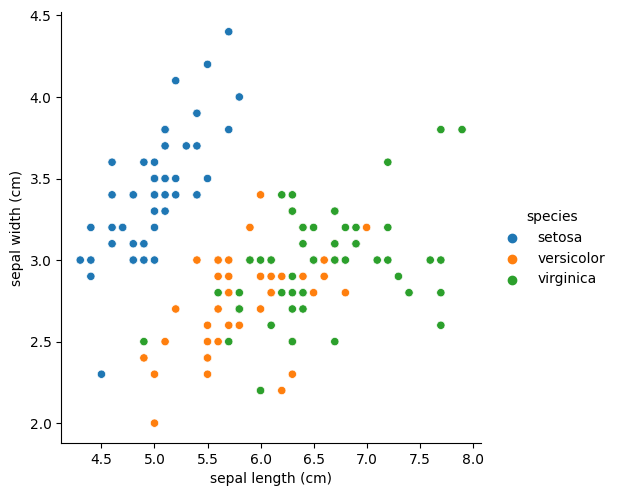

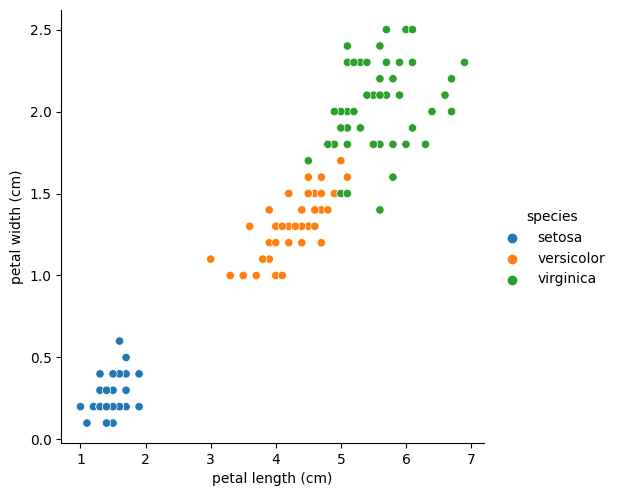

In [ ]:
# 데이터 분석 - 그래프
import matplotlib.pyplot as plt    # 그래프 라이브러리
import seaborn as sns              # matplot를 확장한 그래프 라이브러리
sns.pairplot(df, x_vars=["sepal length (cm)"],
             y_vars=["sepal width (cm)"], hue="species", height = 5)
sns.pairplot(df, x_vars=["petal length (cm)"],
             y_vars=["petal width (cm)"], hue="species", height = 5)
plt.show()

In [ ]:
# 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( x, y,
                                test_size = 0.3, random_state = 42)

# 모델 선정
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', C=10,
           solver='lbfgs', max_iter=1000, random_state = 42)

# 훈련
model.fit(x_train,y_train)

# 훈련 결과
import numpy as np          # 수학 연산 라이브러리
W = model.coef_
b = model.intercept_
print("W= \n", np.round(W,2), "\nb= \n", np.round(b,2))

W= 
 [[-0.38  1.95 -3.98 -1.88]
 [ 0.93  0.07 -0.41 -1.88]
 [-0.56 -2.01  4.39  3.76]] 
b= 
 [ 12.93   2.37 -15.3 ]


In [ ]:
# 분류 과정을 살펴보기 위한 클래스별 데이터 만들기
x_set = [[5.0, 2.5, 2.0, 1.0]]  # setosa
x_ver = [[6.0, 3.0, 4.5, 1.5]]  # versicolor
x_vir = [[6.0, 3.0, 5.0, 2.0]]  # virginica

# 로지스틱 회귀 모델
def H(X):
  Hx = np.matmul(X,W.T)+b  # Hx = WX + b
  return 1/(1+np.exp(-Hx))

# (1) wx + b 출력
print("(1) y = wx + b ")
print("WX+b setosa     : ",np.matmul(x_set,W.T)+b )
print("WX+b versicolor : ",np.matmul(x_ver,W.T)+b )
print("WX+b virginica  : ",np.matmul(x_vir,W.T)+b )

# (2) 소프트맥스 추정 확률
print("(2) 소프트맥스 추정 확률 s(y)")
print("setosa    : ", np.round(model.predict_proba(x_set),2))
print("versicolor: ", np.round(model.predict_proba(x_ver),2))
print("virginica : ", np.round(model.predict_proba(x_vir),2))

# (3) One-hot-encoding 결과
print("(3) One-hot-encoding 결과")
print("입력: setosa     > 추정:", model.predict(x_set))
print("입력: versicolor > 추정:", model.predict(x_ver))
print("입력: virginica  > 추정:", model.predict(x_vir))

# 모델 테스트
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
print("정확도= %.4f" %accuracy_score(y_test, y_pred))

(1) y = wx + b 
WX+b setosa     :  [[  6.06486663   4.51527164 -10.58013827]]
WX+b versicolor :  [[-4.23705593  3.52873781  0.70831812]]
WX+b virginica  :  [[-7.16961813  2.38652847  4.78308966]]
(2) 소프트맥스 추정 확률 s(y)
setosa    :  [[0.82 0.18 0.  ]]
versicolor:  [[0.   0.94 0.06]]
virginica :  [[0.   0.08 0.92]]
(3) One-hot-encoding 결과
입력: setosa     > 추정: [0]
입력: versicolor > 추정: [1]
입력: virginica  > 추정: [2]
정확도= 1.0000


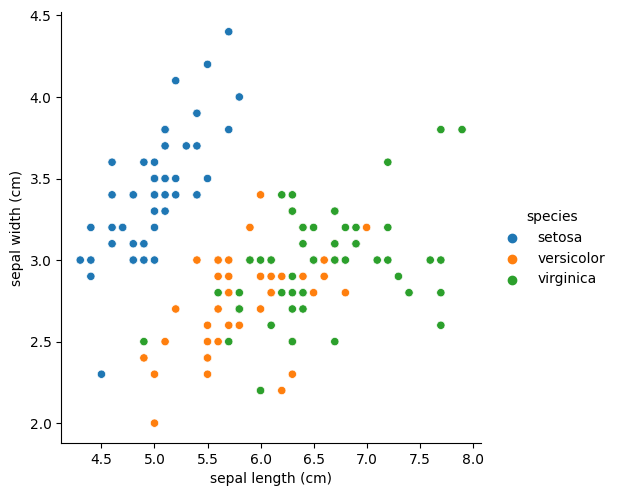

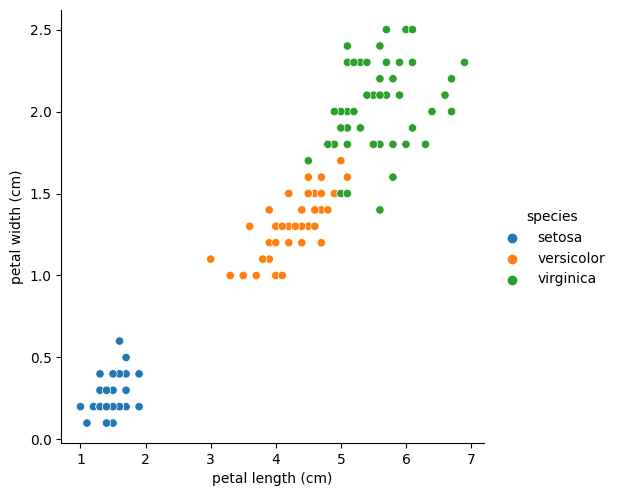

In [ ]:
# 데이터 분석 - 그래프
import matplotlib.pyplot as plt    # 그래프 라이브러리
import seaborn as sns              # matplot를 확장한 그래프 라이브러리
sns.pairplot(df, x_vars=["sepal length (cm)"],
             y_vars=["sepal width (cm)"], hue="species", height = 5)
sns.pairplot(df, x_vars=["petal length (cm)"],
             y_vars=["petal width (cm)"], hue="species", height = 5)
plt.show()

##### [참고] 결정 경계 그래프
[참고 사이트](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)

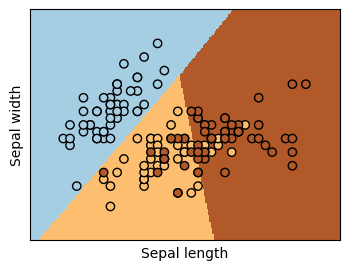

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

##### [참고] 3종의 분류기 비교

In [ ]:
from  sklearn import  datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state = 42)

from sklearn import tree
dtree_clf = tree.DecisionTreeClassifier()
dtree_clf.fit(x_train,y_train)
#y_pred = dtree_clf.predict(x_test)

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
sgd_clf = SGDClassifier(max_iter=1000, random_state= 42)
rndf_clf = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state = 42)
smax_clf = LogisticRegression(multi_class='multinomial',
                                 solver='lbfgs', C=10, max_iter=1000, random_state = 42)

sgd_clf.fit(x_train,y_train)
rndf_clf.fit(x_train,y_train)
smax_clf.fit(x_train,y_train)


from sklearn.metrics import accuracy_score
print("DecisionTree 정확도", accuracy_score(y_test,dtree_clf.predict(x_test)))
print("SGDClassifier 정확도", accuracy_score(y_test,sgd_clf.predict(x_test)))
print("RandomForest 정확도", accuracy_score(y_test,rndf_clf.predict(x_test)))
print("SoftMax 정확도", accuracy_score(y_test,smax_clf.predict(x_test)))


DecisionTree 정확도 1.0
SGDClassifier 정확도 0.8
RandomForest 정확도 1.0
SoftMax 정확도 1.0
